**Random forest Model For Conformation Time Predection**

1.Mount the drive and import the data into dataframe

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Data.txt"

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Dropping the Pre-written Indexes in the dataframes and dropping transaction containing the null values

In [ ]:
df=df.dropna()
df=df.reset_index()
df=df.drop(['index'], axis=1)



3.Printing the dataframe and storing a copy

In [ ]:
df.columns.tolist()
store=df
store

,Hash,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
0,0xecf53982503900a9c58b54fd52af689b50f8875bbbd0...,🔥 Burnt: 0.000264438397062 Ether ($0.43),0.000285438397062 Ether ($0.47),Base: 12.592304622 Gwei,Max: 14.879580769 Gwei,Max Priority: 1 Gwei,0.200436370433348 Ether,"21,000 (100%)","21,000",0.000000013592304622 Ether (13.592304622 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
1,0xc6056646b7516f1a8eafe7d2ef9df34b2c3a4e8979d8...,🔥 Burnt: 0.000264438397062 Ether ($0.43),0.000285438397062 Ether ($0.47),Base: 12.592304622 Gwei,Max: 14.879580769 Gwei,Max Priority: 1 Gwei,0.204233648803851 Ether,"21,000 (100%)","21,000",0.000000013592304622 Ether (13.592304622 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
2,0xd1bfaf9de496033c90210804a972739496efb607c2a3...,🔥 Burnt: 0.000264438397062 Ether ($0.43),0.000285438397062 Ether ($0.47),Base: 12.592304622 Gwei,Max: 14.900955595 Gwei,Max Priority: 1 Gwei,0.205514906823348567 Ether,"21,000 (100%)","21,000",0.000000013592304622 Ether (13.592304622 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
3,0xf669b9cabc2548ab34a06255f543db1908ae1653983c...,🔥 Burnt: 0.000264438397062 Ether ($0.43),0.000285438397062 Ether ($0.47),Base: 12.592304622 Gwei,Max: 14.900955595 Gwei,Max Priority: 1 Gwei,0.205740509932505 Ether,"21,000 (100%)","21,000",0.000000013592304622 Ether (13.592304622 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
4,0x3bec3ba36551a97476011d7580d6a9c35101c3fb6644...,🔥 Burnt: 0.000264438397062 Ether ($0.43),0.000285438397062 Ether ($0.47),Base: 12.592304622 Gwei,Max: 16.16467883 Gwei,Max Priority: 1 Gwei,0.054 Ether,"21,000 (100%)","21,000",0.000000013592304622 Ether (13.592304622 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
...,...,...,...,...,...,...,...,...,...,...,...,...
171540,0x91b64c0577287f7404ae09eb80346607a10862e39933...,🔥 Burnt: 0.001567843702328477 Ether ($2.48),0.006176277157796312 Ether ($9.78),Base: 12.132477751 Gwei,Max: 47.794014856 Gwei,Max Priority: 47.794014856 Gwei,0 Ether,"129,227 (56.38%)","229,227",0.000000047794014856 Ether (47.794014856 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
171541,0x45df92ef835515ffabf7c4f5f8993655344b8ac49715...,🔥 Burnt: 0.003161747966866102 Ether ($5.01),0.003552650966866102 Ether ($5.63),Base: 12.132477751 Gwei,Max: 16.989049998 Gwei,Max Priority: 1.5 Gwei,0 Ether,"260,602 (72.98%)","357,092",0.000000013632477751 Ether (13.632477751 Gwei),"$2,017.78 / ETH",| Confirmed within 26 secs
171542,0x9edb65d2987f8f32c8523fe368338a455d8285227d84...,🔥 Burnt: 0.001785075716460132 Ether ($2.83),0.001785075716460132 Ether ($2.83),Base: 12.132477751 Gwei,Max: 12.132477751 Gwei,Max Priority: 12.132477751 Gwei,0 Ether,"147,132 (59.54%)","247,132",0.000000012132477751 Ether (12.132477751 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs
171543,0xb129d8db3a1bdad0b28f899986383b18e4610d90077f...,🔥 Burnt: 0.001197014519869162 Ether ($1.90),0.006698528038094382 Ether ($10.61),Base: 12.132477751 Gwei,Max: 168.76122031 Gwei,Max Priority: 55.76122031 Gwei,0 Ether,"98,662 (59.56%)","165,638",0.000000067893698061 Ether (67.893698061 Gwei),"$2,017.78 / ETH",| Confirmed within 30 secs


4.Extracting exact ether values into floating points with slicing and type casting
also getting time data into seconds

In [ ]:
def isfloat(num):
    if num is None:
       return False
    try:
        float(num)
        return True
    except ValueError:
        return False

def getBurntval(value):
    list= (str(value)).split()
    return 1000000*Decimal(list[2].replace(',', ""))


def getg(value):
    list= (str(value)).split()
    return Decimal(list[-2].replace(',', ""))



def getEthval(value):
    list= (str(value)).split()
    return 1000000*Decimal(list[0].replace(',', ""))

def getonlytheval(value):
    list= (str(value)).split()
    return Decimal((list[0].replace(',', "")).replace('$', ""))


def getBurns(values):
    output = np.empty(len(values))
    for i in range(len(values)):
         output[i] = getBurntval(values[i])
    return output

 

def getgweis(values):
    output = np.empty(len(values))
    for i in range(len(values)):
         output[i] = getg(values[i])
    return output



def getVals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
         output[i] = getEthval(values[i])
    return output


def getonlyval(values):
    output = np.empty(len(values))
    for i in range(len(values)):
         output[i] = getonlytheval(values[i])
    return output


def Str2sec(value):
    list=(value).split()
    if len(list)==5:
        if list[-1]=='secs':
            return int(list[-2])
        
        elif list[-1]=='min':
            return 60*int(list[-2])
            
    elif len(list)==6 :
        return 60*int(list[-3]) + int(list[-2][list[-2].find(':')+1:])
    
    elif len(list)==7:
        return 60*60*int(list[-4]) + 60*int(list[-3][list[-3].find(':')+1:]) + int(list[-2][list[-2].find(':')+1:])
    
    elif len(list)==9:
        return 24*60*60*int(list[-6]) + 60*60*int(list[-4]) +60*int(list[-3][list[-3].find(':')+1:]) + int(list[-2][list[-2].find(':')+1:])


def absolute(x):
  return abs(x)%15

def getTS(values):
    output = np.empty(len(values),object)
    for i in range(len(values)):
        st=values[i]
        output[i]=st[(st.find("("))+1 : st.find("+")]
    return output




def Cnvrt2Sec(values):
    output = np.empty(len(values))
    for i in range(len(values)):
      if(isfloat(Str2sec(str(values[i])))):
         output[i]=Str2sec(str(values[i]))
      else:
         output[i]=np.nan  
    return output


df['TxnFees']=getVals(df['TxnFees'])
df['Burnt']=getBurns(df['Burnt']) 
df['CompletionTime'] = Cnvrt2Sec(df['CompletionTime'])
df['Gasprice']=getVals(df['Gasprice'])  
df['Gaslimit']=getonlyval(df['Gaslimit']) 
df['Etherprice']=getonlyval(df['Etherprice']) 
df['Gasusage']=getonlyval(df['Gasusage']) 
df['Basefees']=getgweis(df['Basefees'])
df['Txnval']=getVals(df['Txnval'])

df['Tip']=getgweis(df['Tip'])
df['Maxfees/gas']=getgweis(df['Maxfees/gas'])

df



,Hash,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
0,0xecf53982503900a9c58b54fd52af689b50f8875bbbd0...,264.438397,285.438397,12.592305,14.879581,1.000000,200436.370433,21000.0,21000.0,0.013592,2017.78,30.0
1,0xc6056646b7516f1a8eafe7d2ef9df34b2c3a4e8979d8...,264.438397,285.438397,12.592305,14.879581,1.000000,204233.648804,21000.0,21000.0,0.013592,2017.78,30.0
2,0xd1bfaf9de496033c90210804a972739496efb607c2a3...,264.438397,285.438397,12.592305,14.900956,1.000000,205514.906823,21000.0,21000.0,0.013592,2017.78,30.0
3,0xf669b9cabc2548ab34a06255f543db1908ae1653983c...,264.438397,285.438397,12.592305,14.900956,1.000000,205740.509933,21000.0,21000.0,0.013592,2017.78,30.0
4,0x3bec3ba36551a97476011d7580d6a9c35101c3fb6644...,264.438397,285.438397,12.592305,16.164679,1.000000,54000.000000,21000.0,21000.0,0.013592,2017.78,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
171540,0x91b64c0577287f7404ae09eb80346607a10862e39933...,1567.843702,6176.277158,12.132478,47.794015,47.794015,0.000000,129227.0,229227.0,0.047794,2017.78,30.0
171541,0x45df92ef835515ffabf7c4f5f8993655344b8ac49715...,3161.747967,3552.650967,12.132478,16.989050,1.500000,0.000000,260602.0,357092.0,0.013632,2017.78,26.0
171542,0x9edb65d2987f8f32c8523fe368338a455d8285227d84...,1785.075716,1785.075716,12.132478,12.132478,12.132478,0.000000,147132.0,247132.0,0.012132,2017.78,30.0
171543,0xb129d8db3a1bdad0b28f899986383b18e4610d90077f...,1197.014520,6698.528038,12.132478,168.761220,55.761220,0.000000,98662.0,165638.0,0.067894,2017.78,30.0


5.The columns which were not convertable to float64 are dropped and describe the dataframe

In [ ]:
df=df.dropna()
df=df.reset_index()
df=df.drop(['index'], axis=1)

df.describe()

,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
count,169640.000000,169640.000000,169640.000000,169640.000000,1.696400e+05,1.696400e+05,1.696400e+05,1.696400e+05,169640.000000,169640.000000,1.696400e+05
mean,2158.995118,2405.615680,23.275697,61.842330,4.161447e+00,7.743997e+05,9.346901e+04,1.536115e+05,0.026349,1991.262206,1.301250e+03
std,6316.328288,7497.975568,14.458988,137.840335,1.773473e+01,1.439689e+07,2.164689e+05,2.937623e+05,0.021945,45.099105,1.072092e+05
min,222.452353,243.452353,10.592969,11.729721,1.000000e-09,0.000000e+00,2.100000e+04,2.100000e+04,0.011593,1911.680000,2.000000e+00
25%,426.856879,508.529824,13.648389,21.889210,1.500000e+00,0.000000e+00,2.100000e+04,2.100000e+04,0.015426,1956.880000,3.000000e+01
50%,966.104940,1067.116515,16.364887,30.436435,2.000000e+00,9.346193e+02,4.626700e+04,7.263250e+04,0.018777,2017.780000,3.000000e+01
75%,2371.691715,2666.508583,27.866903,53.034337,2.000000e+00,4.900000e+04,9.880850e+04,2.073548e+05,0.030247,2017.780000,3.000000e+01
max,752080.564151,972549.858649,83.325786,3500.000000,1.145495e+03,1.334000e+09,1.778426e+07,2.280974e+07,1.170992,2017.780000,1.744572e+07


6.Hash value is dropped as it doesn't effect conformation time

In [ ]:
df=df.drop(columns =['Hash'])
df

,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
0,264.438397,285.438397,12.592305,14.879581,1.000000,200436.370433,21000.0,21000.0,0.013592,2017.78,30.0
1,264.438397,285.438397,12.592305,14.879581,1.000000,204233.648804,21000.0,21000.0,0.013592,2017.78,30.0
2,264.438397,285.438397,12.592305,14.900956,1.000000,205514.906823,21000.0,21000.0,0.013592,2017.78,30.0
3,264.438397,285.438397,12.592305,14.900956,1.000000,205740.509933,21000.0,21000.0,0.013592,2017.78,30.0
4,264.438397,285.438397,12.592305,16.164679,1.000000,54000.000000,21000.0,21000.0,0.013592,2017.78,30.0
...,...,...,...,...,...,...,...,...,...,...,...
169635,1567.843702,6176.277158,12.132478,47.794015,47.794015,0.000000,129227.0,229227.0,0.047794,2017.78,30.0
169636,3161.747967,3552.650967,12.132478,16.989050,1.500000,0.000000,260602.0,357092.0,0.013632,2017.78,26.0
169637,1785.075716,1785.075716,12.132478,12.132478,12.132478,0.000000,147132.0,247132.0,0.012132,2017.78,30.0
169638,1197.014520,6698.528038,12.132478,168.761220,55.761220,0.000000,98662.0,165638.0,0.067894,2017.78,30.0


7.Correlation is calculated in order to understand the features relation with the conformation time

In [ ]:
corrM = df.corr()
corrM


,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
Burnt,1.000000,0.978018,0.193905,0.000526,-0.001141,0.000380,0.862988,0.776196,0.123570,-0.151968,-0.002558
TxnFees,0.978018,1.000000,0.166249,0.026674,0.125622,0.000353,0.839198,0.761819,0.203945,-0.132060,-0.002436
Basefees,0.193905,0.166249,1.000000,0.187726,0.010814,-0.003035,-0.005291,0.027212,0.661085,-0.750068,-0.001416
Maxfees/gas,0.000526,0.026674,0.187726,1.000000,0.175209,0.044324,-0.042998,-0.016777,0.274426,-0.145782,0.000459
Tip,-0.001141,0.125622,0.010814,0.175209,1.000000,-0.001594,-0.014272,0.015941,0.726577,-0.023841,-0.001642
Txnval,0.000380,0.000353,-0.003035,0.044324,-0.001594,1.000000,-0.000893,-0.002778,-0.002313,0.002426,-0.000580
Gasusage,0.862988,0.839198,-0.005291,-0.042998,-0.014272,-0.000893,1.000000,0.866215,-0.012043,0.002275,-0.002510
Gaslimit,0.776196,0.761819,0.027212,-0.016777,0.015941,-0.002778,0.866215,1.000000,0.031428,-0.020468,-0.001508
Gasprice,0.123570,0.203945,0.661085,0.274426,0.726577,-0.002313,-0.012043,0.031428,1.000000,-0.504748,-0.001781
Etherprice,-0.151968,-0.132060,-0.750068,-0.145782,-0.023841,0.002426,0.002275,-0.020468,-0.504748,1.000000,-0.005839


8.Plotting the relations

,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
0,264.438397,285.438397,12.592305,14.879581,1.000000,200436.370433,21000.0,21000.0,0.013592,2017.78,30.0
1,264.438397,285.438397,12.592305,14.879581,1.000000,204233.648804,21000.0,21000.0,0.013592,2017.78,30.0
2,264.438397,285.438397,12.592305,14.900956,1.000000,205514.906823,21000.0,21000.0,0.013592,2017.78,30.0
3,264.438397,285.438397,12.592305,14.900956,1.000000,205740.509933,21000.0,21000.0,0.013592,2017.78,30.0
4,264.438397,285.438397,12.592305,16.164679,1.000000,54000.000000,21000.0,21000.0,0.013592,2017.78,30.0
...,...,...,...,...,...,...,...,...,...,...,...
169635,1567.843702,6176.277158,12.132478,47.794015,47.794015,0.000000,129227.0,229227.0,0.047794,2017.78,30.0
169636,3161.747967,3552.650967,12.132478,16.989050,1.500000,0.000000,260602.0,357092.0,0.013632,2017.78,26.0
169637,1785.075716,1785.075716,12.132478,12.132478,12.132478,0.000000,147132.0,247132.0,0.012132,2017.78,30.0
169638,1197.014520,6698.528038,12.132478,168.761220,55.761220,0.000000,98662.0,165638.0,0.067894,2017.78,30.0


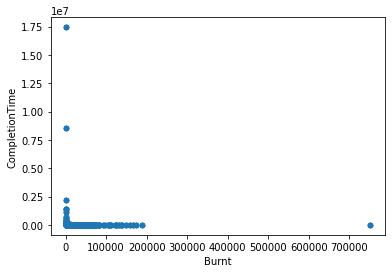

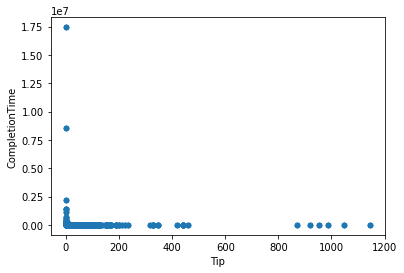

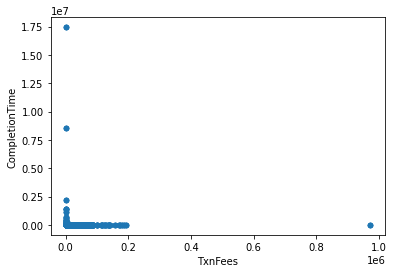

In [ ]:
df.plot(y='CompletionTime',x='Burnt',kind='scatter')
df.plot(y='CompletionTime',x='Tip',kind='scatter')
df.plot(y='CompletionTime',x='TxnFees',kind='scatter')
df

9 **Normalization Standardization using the MinMaxScalar**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df)
scaled=pd.DataFrame(scaled,columns=['Burnt','TxnFees','Basefees','Maxfees/gas','Tip','Txnval','Gasusage','Gaslimit','Gasprice','Etherprice','CompletionTime'])
scaled

,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
0,0.000056,0.000043,0.027489,0.000903,0.000873,0.000150,0.000000,0.000000,0.001724,1.0,0.000002
1,0.000056,0.000043,0.027489,0.000903,0.000873,0.000153,0.000000,0.000000,0.001724,1.0,0.000002
2,0.000056,0.000043,0.027489,0.000909,0.000873,0.000154,0.000000,0.000000,0.001724,1.0,0.000002
3,0.000056,0.000043,0.027489,0.000909,0.000873,0.000154,0.000000,0.000000,0.001724,1.0,0.000002
4,0.000056,0.000043,0.027489,0.001271,0.000873,0.000040,0.000000,0.000000,0.001724,1.0,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
169635,0.001789,0.006102,0.021167,0.010339,0.041723,0.000000,0.006093,0.009137,0.031224,1.0,0.000002
169636,0.003909,0.003403,0.021167,0.001508,0.001309,0.000000,0.013489,0.014748,0.001759,1.0,0.000001
169637,0.002078,0.001586,0.021167,0.000115,0.010591,0.000000,0.007101,0.009923,0.000465,1.0,0.000002
169638,0.001296,0.006639,0.021167,0.045017,0.048679,0.000000,0.004372,0.006347,0.048560,1.0,0.000002


In [ ]:
scaled.describe()

,Burnt,TxnFees,Basefees,Maxfees/gas,Tip,Txnval,Gasusage,Gaslimit,Gasprice,Etherprice,CompletionTime
count,169640.000000,169640.000000,169640.000000,169640.000000,169640.000000,1.696400e+05,169640.000000,169640.000000,169640.000000,169640.000000,169640.000000
mean,0.002576,0.002224,0.174374,0.014366,0.003633,5.805097e-04,0.004080,0.005819,0.012727,0.750068,0.000074
std,0.008401,0.007712,0.198796,0.039515,0.015482,1.079228e-02,0.012186,0.012891,0.018928,0.425062,0.006145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000272,0.000273,0.042009,0.002912,0.001309,0.000000e+00,0.000000,0.000000,0.003306,0.426013,0.000002
50%,0.000989,0.000847,0.079358,0.005363,0.001746,7.006144e-07,0.001422,0.002266,0.006196,1.000000,0.000002
75%,0.002859,0.002492,0.237498,0.011841,0.001746,3.673164e-05,0.004380,0.008177,0.016090,1.000000,0.000002
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


10. **Test Train Split**

In [ ]:

y = df[ 'CompletionTime']

x = df.drop(['CompletionTime'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
print (f'x_train : {X_train.shape}')
print (f'y_train : {y_train.shape}')
print (f'x_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')



x_train : (135712, 10)
y_train : (135712,)
x_test: (33928, 10)
y_test: (33928,)


11.**Random Search CV to get best parameters for our RandomForest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [20, 29, 39, 49, 59, 68, 78, 88, 98, 108, 117, 127, 137, 147, 157, 166, 176, 186, 196, 206, 215, 225, 235, 245, 255, 264, 274, 284, 294, 304, 313, 323, 333, 343, 353, 362, 372, 382, 392, 402, 411, 421, 431, 441, 451, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 67, 124, 182, 239, 296, 354, 411, 468, 526, 583, 641, 698, 755, 813, 870, 927, 985, 1042, 1100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator= rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 40)

In [ ]:
rf_random.fit(X_train, y_train)  

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=40,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 67, 124, 182, 239,
                                                      296, 354, 411, 468, 526,
                                                      583, 641, 698, 755, 813,
                                                      870, 927, 985, 1042, 1100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 29, 39, 49, 59, 68,
                                                         78, 88, 98, 108, 117,
                                                         127, 137, 147, 157

12.**Best parameter for our model**

In [ ]:
rf_random.best_params_

{'n_estimators': 353,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 698,
 'bootstrap': True}

13.**Evaluate the hence trained model on Test and Train data and calculate accuracy**

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = absolute(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')


    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


rf_random.fit(X_train, y_train)  


best_random = rf_random
print("On Train Data")
random_accuracy = evaluate(best_random, X_train, y_train)  
print("On Test Data")
random_accuracy = evaluate(best_random, X_test, y_test) 

On Train Data
Model Performance
Average Error: 3.0692 degrees.
Accuracy = 77.18%.
On Test Data
Model Performance
Average Error: 4.2754 degrees.
Accuracy = 70.75%.
